In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Single First Order Differential Equations

In [3]:
def Euler_For(y0,t0,tf,h,fcn):
    # fcn must be a function defined with two arguments (y(x),x)
    # Just one variable
    # Defines the Euler forward method for 
    # First order ODEs.
    # Y'[t] ~ 1/h [Y(t+h)-Y(t) ]
    # Y'[t] = f(tn,Y(tn))
    # Y [tn+1] ~ Y[tn] +h f(tn,Y(tn))

    #Start the algorithm
    res=np.zeros(int((tf-t0)/h));
    res[0]=y0;
    t=t0+h;
    #Loop over
    for i in range(1,len(res)):
        res[i] = res[i-1] + h * fcn(res[i-1],t);
        t=t+h;
    return res;

[]

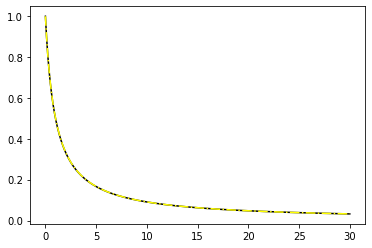

In [4]:
# Define a function f(y(t),) 
def myfunc(y,x):
    return -y**2
def realfx(x):
    return 1/(x+1)
# Comparison of the analytical and the Euler Forward result
euler=Euler_For(y0=1.0,t0=0.0,tf=30.0,h=0.01,fcn=myfunc);
plt.plot(np.arange(0.0,len(euler)*0.01,0.01),euler,linewidth=1.5,color="black")
plt.plot(np.arange(0.0,len(euler)*0.01,0.01),realfx(np.arange(0.0,len(euler)*0.01,0.01)),linestyle="-.",color="yellow")
plt.plot()
    

# Analysis of the Error of the Euler method
Y(t$_n$+1)= Y(t$_n$)+h*Y'(t$_n$)+h^2Y''($eps_n$)

Propagation Error

T$_{n+1}$=0.5 h² Y''(eps$_n$)
   


In [12]:
# Systems of Diferential Equations

# High Order Differential Equations

Euler method

Y''(t)=f(t,Y(t),Y'(t)) 

Two initial conditions

Y(t$_0$)=Y$_0$, Y'(t$_0$)=Y'$_0$

Change of Variable and convert to a first order system.

Y$_1$'(t) = Y$_2$(t)  

Y$_1$(t$_0$)=Y$_0$

Y$_2$'(t)= f(t,Y$_1$(t),Y$_2$(t))

Y$_2$(t$_0$)=Y$_0$'




In [6]:
# Second order Euler Method
# I can be generalized to any order with the Eulers method
def Euler_For_2ord(t0,y0,yk0,tf,h,fcn):
    # Initialize the result array
    res=np.zeros(int((tf-t0)/h))
    res[0]=y0;
    res[1]=y0+h*yk0;
    t=t0+2*h;
    # Loop over all the values
    for i in range(2,len(res)):
        der=(1/h)*(res[i-1]-res[i-2])
        res[i]=2*res[i-1]-res[i-2]+h*h*fcn(der,res[i-2],t)
        t=t+h;
    return res;



In [7]:
# Euler Backward Method (absolutely stable)

def Euler_Back(t0,y0,tf,h,fcn,tol=0.001,maxsteps=10):
    # Now we solve the Euler Backward method
    # tolerance (difference between recursive steps)
    res=np.zeros(int((tf-t0)/h));
    res[0]=y0;
    t=t0+h;
    for i in range(1,len(res)):
        stit = res[i-1] + h * fcn(res[i-1],t);
        # The starting tolerance
        diff=1.0;
        count=0;
        while diff>tol and count<maxsteps:
            nit = res[i-1]+h*fcn(stit,t);
            # get the new diff
            diff = abs(nit-stit);
            count=count+1;
        res[i]=nit;
        t=t+h;
        if count>=10:
            print("Not converged after maxtsteps "+str(maxsteps)+" in the step "+str(i) +
                 "\n diff"+str(diff));
    return res; 
            
# Need to get the error for the Euler approach

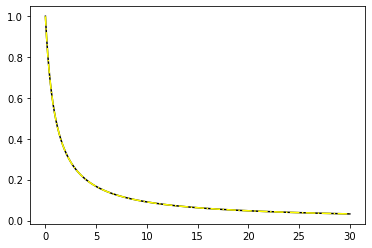

In [8]:
# Here I will try to solve exactly the same problem that with the Euler forward method

def myfunc(y,x):
    return -y**2

def realfx(x):
    return 1/(x+1)

euler = Euler_Back(y0=1.0,t0=0.0,tf=30.0,h=0.001,fcn=myfunc,tol=0.001);
plt.plot(np.arange(0.0,len(euler)*0.001,0.001),euler,linewidth=1.5,color="black")
plt.plot(np.arange(0.0,len(euler)*0.001,0.001),realfx(np.arange(0.0,len(euler)*0.001,0.001)),linestyle="-.",color="yellow")
#plt.plot()
plt.show()






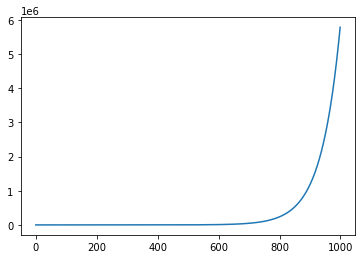

In [9]:
# This is my Function defined for the second order Euler Method
def myfun(yk,y,x):
    return yk + y + 2*x +1;

derivative=Euler_For_2ord(0.0,0.0,0.0,10.0,0.01,myfun)


plt.plot(derivative)
plt.show()

# Trapezoid Method 
It is based in the trapezoid integration that exposes that:

$\int_{a}^{b}Y(x) dx\approx0.5\cdot(b-a)\cdot(Y(a) - Y(b))$

$Y'( Y(x) , x )= F(Y(x),x)$

We integrate this equation between x'+h and x' and we obtain the Trapezoid implicit formula

$\int_{x'}^{x'+h}Y'(x)dx=Y(x'+h)-Y(x')\approx0.5(x'+h-x')(F(y(x'),x')+F(y(x'+h),x'+h)))$

$Y(x'+h)=Y(x')+0.5(x'+h-x')(F(y(x'),x')+F(y(x'+h),x'+h)))$

The implicit method can be expanded to the explicit with the next formula

In [10]:
# Explicit Trapezoidal Method (higher order of conversion):Just apply the trapezoid integral rule
def Trapezoidal(t0,y0,tf,h,fcn,tol=0.001,maxsteps=100):
    res = np.zeros(int((tf-t0)/h))
    res[0]=y0;
    t=t0;
    # we need a predictor for the estimate (we use the Euler method)
    for i in range(0,len(res)-1):
        stit = res[i]+(h*fcn(res[i],t));
        count=0;
        diff=1;
        while diff>tol and count<maxsteps:
            # Here I calculate the stit
            nit = res[i]+0.5*h*(fcn(res[i],t) + fcn(stit,t+h))
            diff=abs(nit-stit)
            stit=nit;
            count=count+1;
        res[i+1] = nit;
        t=t+h;
    if count>=maxsteps:
        print("Not converged after maxtsteps "+str(maxsteps)+" in the step "+str(i) +
                 "\n diff"+str(diff));
    return res;
    
    


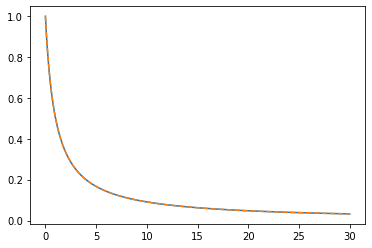

In [11]:
def myfunc(y,x):
    return -y**2

def realfx(x):
    return 1/(x+1)

h=0.001
t0=0.0
tf=30.0
y0=1.0
tol=0.001
nsteps=int((tf-t0)/h)
# Perform the Trap
trap = Trapezoidal(y0=y0,t0=t0,tf=tf,h=h,fcn=myfunc,tol=tol);
X=np.arange(0,nsteps)*0.001
plt.plot(X,trap)
plt.plot(X,realfx(X),linestyle="--")
plt.show()

# Runge-Katta

In [ ]:
# Get the simplest Runge-Katta for the solving of easy
def RK2():
    pass